# CW 03 Part 2 - Focal spot comparison between a thick and an ideal lens

In the case of a planoconvex lens, the radius of curvature and the index of the material determines the focal length.


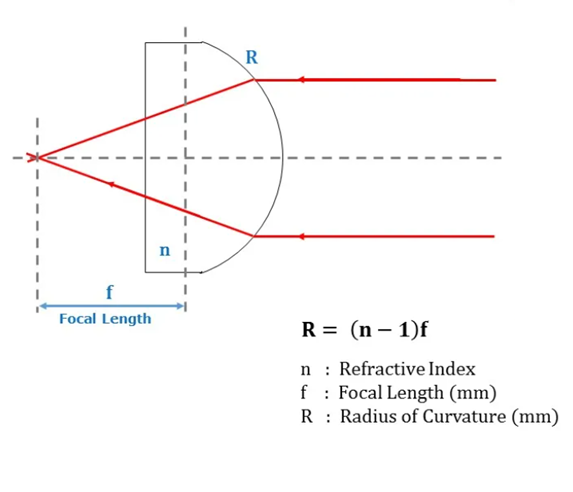


Due to non-zero thickness of the lens, the field after a thick lens deviates from the ideal quadratic phase distribution, which can create effects observable through its resulting intensity distribution in the focal plane. 

In this exercise, we will compare the focal spot sizes of a thick and an ideal lens both in transversal and axial directions for focal lengths of 0.7, 1 and 1.5 mm for a lens thickness of $ 100 \mu m$.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
array_size = 800e-6  
num_pixels = 512  # Resolution

dx = array_size / num_pixels  # Pixel size

wvl = 633e-9
dz_lens = 1e-6 # z lens sampling
dz_fs = 10e-6 # z free space sampling

fs_prop_distance = 1.2e-3

# Create spatial coordinate grid
x = np.linspace(-array_size / 2, array_size / 2, num_pixels)
y = np.linspace(-array_size / 2, array_size / 2, num_pixels)
X, Y = np.meshgrid(x, y)

In [ ]:
#define lens stack

lens_thickness = 1e-4
focal_length = 0.5e-3
n_lens = 1.5

r_curvature = focal_length*(n_lens-1)
lens_z_steps = np.ceil(lens_thickness/dz_lens).astype('int')
lens_stack = np.zeros((lens_z_steps,num_pixels,num_pixels))

for i in range(lens_z_steps):
    r_lens = np.sqrt(np.maximum(r_curvature**2 - (r_curvature-lens_thickness+i*dz_lens)**2,0))  
    lens_stack[i] = (X**2+Y**2)<r_lens**2
lens_stack *=  (n_lens-1)

In [ ]:
plt.imshow(lens_stack[0]);plt.colorbar();plt.show()

In [ ]:
def angular_spectrum_propagation_range_lens_thick(U0, wvl, dx, dz_lens,lens_z_steps, dz_fs,num_steps_fs , lens_stack, absorptive_boundary= False):
    """
    Propagates an optical field using the Angular Spectrum Method over a range of distances.

    Parameters:
        U0      : 2D numpy array (input wavefield)
        wvl     : float (wavelength of light in meters)
        d_range : list or numpy array (range of propagation distances in meters)
        dx      : float (sampling interval in meters)

    Returns:
        U_list  : list of 2D numpy arrays (propagated wavefields for each distance in d_range)
    """
    
    # Define refractive index
    
    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)
    
    # Initialize list to store results
    U_list = []
    
    # Apply super Gaussian absorptive boundary

    if absorptive_boundary:
        sigma = nx/3.5  # Standard deviation for Gaussian
        X, Y = np.meshgrid(np.linspace(-nx/2, nx/2, nx), np.linspace(-ny/2, ny/2, ny))
        window = np.exp(-((X**2 + Y**2) / (2 * sigma**2))**4)
    else:
        window = np.ones_like(U0)
        
    H_lens = np.exp(1j * k * dz_lens * np.sqrt(0j+ 1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
    H_fs= np.exp(1j * k * dz_fs * np.sqrt(0j+ 1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))

    for st in range(lens_z_steps):
        
        # Apply transfer function
        U_spectrum = np.fft.fft2(U0*np.exp(1j*k*lens_stack[st]*dz_lens)) * H_lens
        
        # Inverse FFT to obtain propagated field
        U0 = np.fft.ifft2(U_spectrum)
        U0 *= window
        U_list.append(U0)

    for _ in range(num_steps_fs):
        
        # Apply transfer function
        U_spectrum = np.fft.fft2(U0) * H_fs
        
        # Inverse FFT to obtain propagated field
        U0 = np.fft.ifft2(U_spectrum)
        U0 *= window
        U_list.append(U0)        
    return U_list


In [ ]:
fs_z_steps = np.round(fs_prop_distance / dz_fs).astype(int)

U0 = np.ones_like(X)

grating_zs = angular_spectrum_propagation_range_lens_thick(U0, wvl, dx, dz_lens,lens_z_steps, dz_fs, fs_z_steps,lens_stack, True)
array_3d = np.stack(grating_zs)


In [ ]:
# Display the grating
plt.figure(figsize=(6, 6))

plt.imshow(np.flip(np.abs(array_3d[lens_z_steps:, 256, :])**2,axis =0), cmap="turbo",aspect = 'auto',extent=[-array_size/2*1e6, array_size/2*1e6, 0,fs_prop_distance*1e6],alpha= 1.0)
plt.xlabel("x [um]")
plt.ylabel("z [um]")
plt.colorbar(label="Amplitude")
plt.show()

In [ ]:
k = 2 * np.pi / wvl  # Wave number

# Define a perfect quadratic phase profile
thin_lens = 
plt.imshow(np.angle(thin_lens));plt.colorbar();plt.show()

U0 = np.ones_like(X)*thin_lens
grating_zs = angular_spectrum_propagation_range_lens_thick(U0, wvl, dx, dz_lens,0, dz_fs, fs_z_steps,lens_stack, True)


array_3d = np.stack(grating_zs, axis=0)

In [ ]:
# Display the grating
plt.figure(figsize=(6, 6))

plt.imshow(np.flip(np.abs(array_3d[:, 256, :])**2,axis =0), cmap="turbo",aspect = 'auto',extent=[-array_size/2*1e6, array_size/2*1e6, 0,fs_prop_distance*1e6],alpha= 1.0)
plt.colorbar(label="Amplitude")